# Studies on Gym Exercices

## Introduction

People who exercice may have a predilection for certain types of exercices in fonction of their level of fitness and need for equipment.

We are going to analyse the correlation between :

- Type of Exercice and Body Part
- Type of Exercice and Equipment
- Type of Exercice and Level
- Body Part and Equipment
- Level and Equipment
- Level and Body Part

Intuition would say beginners would prefer cardio and no equipment exercices wereares expert athletes would prefer strenght equiped exercices.

We will develop and hipotesize our analysis going forward as we stablish correlations between the variables.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [61]:
df = pd.read_csv("megaGymDataset.csv")
df.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


The first column needs to be renamed so it can easily be called and manipulated

In [62]:
#Change column name from Unnamed to Index

df.columns = df.columns.str.replace('Unnamed: 0', 'Index')
df.tail()

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2917,2917,30 Arms EZ-Bar Skullcrusher,NaN,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


## Data Cleaning

Now it is time to check for non representative data and to clean the data frame if needed

In [63]:
#Checking for non representative data

df.isnull().sum()

Index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

Only some equipment lines are missing, the rest of the missing data are non significatif entries : description, rating and rating description

In [64]:
#Checking the column data types 

df.dtypes

Index           int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

## Data analysis & Visualization

### Types of Exercices

Let's have a look at which body parts are used in each type of exercice.

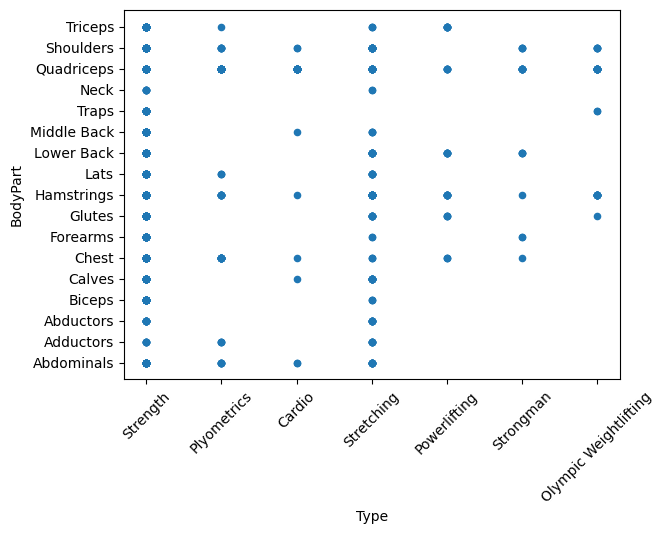

In [149]:
#Plotting type x body part scatter graph

fig = df.plot.scatter('Type', 'BodyPart', rot = 45)

Based on this visualization we can hipotesize that strengh and stretching exercices are the most comprehensive types, allowing to work on most body parts.

Moving forward, we are going to have a look if certain types of exercice are more prone to equipment utilisation.

In [125]:
#Separate the exercices withouot equipment

bodyOnly = df[df.Equipment == 'Body Only']
bodyOnly

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
185,185,Elbow plank,The elbow plank is a popular isometric abdomin...,Strength,Abdominals,Body Only,Intermediate,9.3,Average
186,186,Bottoms Up,The lying leg lift is a popular bodyweight exe...,Strength,Abdominals,Body Only,Intermediate,9.3,Average
187,187,Spider crawl,The spider crawl is a bodyweight exercise that...,Strength,Abdominals,Body Only,Intermediate,9.2,Average
188,188,Cocoons,The cocoon crunch is a bodyweight exercise tar...,Strength,Abdominals,Body Only,Intermediate,9.1,Average
189,189,Cross-Body Crunch,The elbow-to-knee crunch is a bodyweight exerc...,Strength,Abdominals,Body Only,Intermediate,9.1,Average
...,...,...,...,...,...,...,...,...,...
2905,2905,Holman Couch Triceps Dip,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2906,2906,FYR2 Triceps Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2907,2907,30 Arms Triceps Dip,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN
2908,2908,30 Arms Close-Grip Push-Up,NaN,Strength,Triceps,Body Only,Intermediate,NaN,NaN


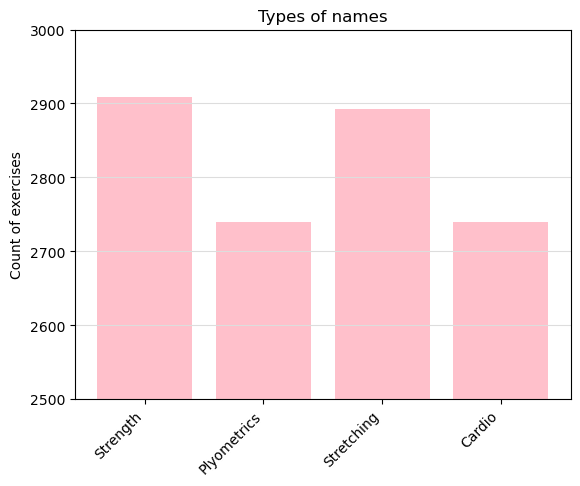

In [147]:
#Plot the graph to analyse with type of exercice is most representative of body only equipment

fig2, ax = plt.subplots()

ax.bar(bodyOnly.Type, bodyOnly.Index, color = 'pink')

ax.set_ylabel('Count of exercises')
ax.set_title('Types of names')
plt.xticks(rotation=45, ha='right')
plt.grid(color = '#dddddd', axis = 'y')
plt.ylim((2500, 3000))

plt.show()

Of all the body only exercices, Strength and Stretching seems to be the most frequent in comparison to Plyometrics and Cardio. Clearly Powerlifting, Olympic Weightlifting and Strongman are categories that requires some equipment by definition.